# Building a survival model for the Titanic Kaggle competition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
# Read data out into train and test dataframes
train = pd.read_csv('../data/train.csv', index_col='PassengerId')
test = pd.read_csv('../data/test.csv', index_col='PassengerId')

### Exploring the data

In [3]:
# Print out the top 5 rows of the training data
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Print out the top 5 rows of the test data
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# look at the datatypes and null values for the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# Look at the columns present in both training and test data
print('Train data columns: ', train.columns)
print('Test data columns: ', test.columns)

Train data columns:  Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test data columns:  Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# Look at what data is categorical data
s = (train.dtypes == 'object')
object_cols = list(s[s].index)
print('Categorical columns: ', object_cols)

Categorical columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### Exploring relationships in the data

Text(0.5, 1.0, 'Realtionship between age and fare split by survival on the Titanic')

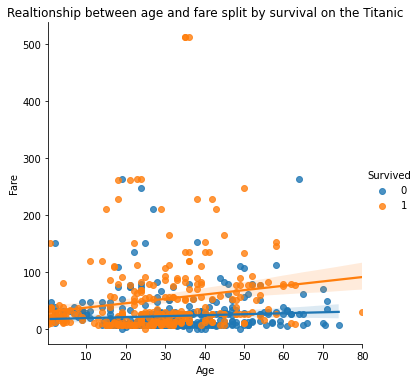

In [8]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train)
plt.title('Realtionship between age and fare split by survival on the Titanic')

We can a positive coloration for those who surrived between thier age and the fare they paid. Showing that older passengers tended to pay more for their fare. We  However for those who did not surrive while still positive this relationship is less evident.

Text(0.5, 1.0, 'Realtionship between having siblings or spouse with you and being a parent or child split by survival on the Titanic')

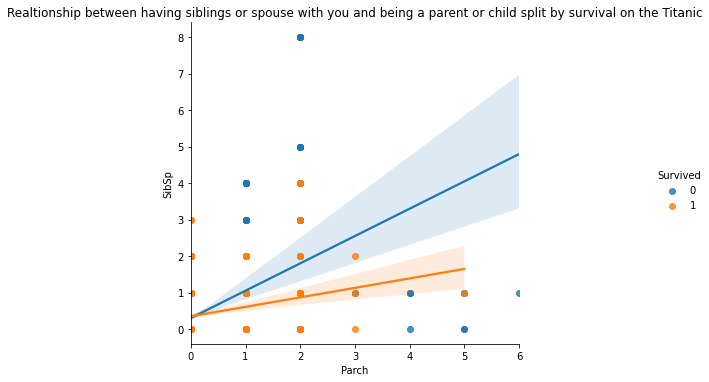

In [9]:
sns.lmplot(x='Parch', y='SibSp', hue='Survived', data=train)
plt.title('Realtionship between having siblings or spouse with you and being a parent or child split by survival on the Titanic')

In both those who surrived and those who did not there is a positive correlation between a passenger having more siblings or spouse and being a parent or child, perhaps indicating the amount of families travelling aboard.

Text(0.5, 1.0, 'Realtionship between age and having a sibling or spouse split by survival on the Titanic')

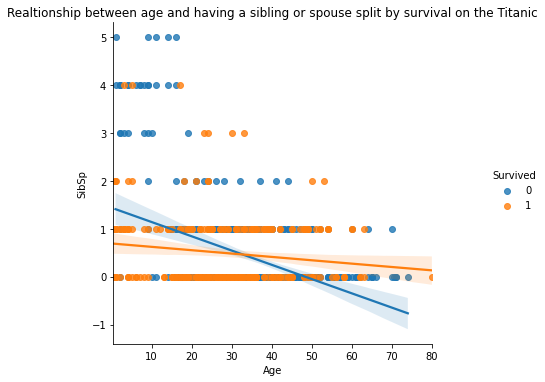

In [52]:
sns.lmplot(x='Age', y='SibSp', hue='Survived', data=train)
plt.title('Realtionship between age and having a sibling or spouse split by survival on the Titanic')

Here regardless of your surrival the older you were the less likely you had a sibling or spouse with you.

In [53]:
sex_grouped_by_survival = train.groupby(['Survived']).Sex.value_counts().sort_index()
sex_grouped_by_survival

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

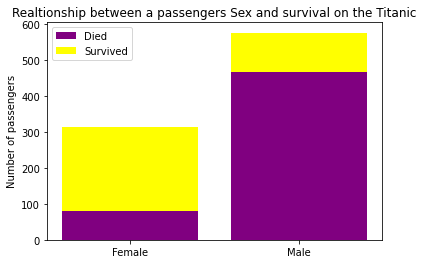

In [54]:
survived = plt.bar(range(len(sex_grouped_by_survival[0])), sex_grouped_by_survival[0], color='purple')
died = plt.bar(range(len(sex_grouped_by_survival[1])), sex_grouped_by_survival[1], color='yellow', bottom=sex_grouped_by_survival[0])
plt.legend([survived, died], ['Died', 'Survived'])
labels = ['Female', 'Male', ]
plt.xticks(range(len(sex_grouped_by_survival[1])), labels)
plt.ylabel('Number of passengers')
plt.title('Realtionship between a passengers Sex and survival on the Titanic')
plt.show()

### Looking at the relationship class and sex has on survival on the Titanic

In [55]:
print(train.groupby(['Sex', 'Pclass']).mean()['Survived'])
print(train.groupby(['Sex', 'Pclass']).std()['Survived'])

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64
Sex     Pclass
female  1         0.176716
        2         0.271448
        3         0.501745
male    1         0.484484
        2         0.365882
        3         0.342694
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Survival,Class,Sex'>

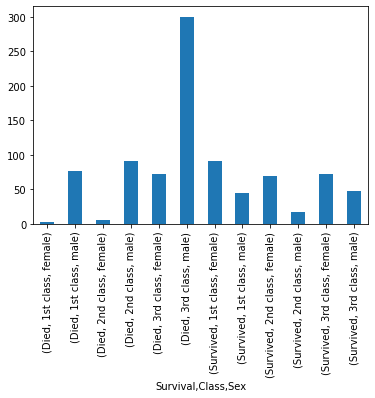

In [56]:
train['Survival'] = train.Survived.map(lambda t: 'Survived' if t == 1 else 'Died')
train['Class'] = train.Pclass.map(lambda t: '1st class' if t == 1 else ('2nd class' if t == 2 else '3rd class'))

(train
.groupby(['Survival', 'Class', 'Sex'])
.Class
.count()
.plot(kind='bar')
)

The largest group from the Titanic by far was 3rd class males who died by quite a gap. We can also see that females in 1st and 2nd class more often survived than died but females from 3rd class appear to be split in half between those which survived and those who did not.

### Female Passengers statistics (for the training data)

In [57]:
#Number of Female passengers
female_passengers = train.loc[train['Sex'] == 'female']
print('Number of female passengers in training data: ', len(female_passengers))

# Number of female passengers under 18
female_passengers_under_18 = female_passengers.loc[female_passengers['Age'] < 18]
print('Number of female passengers under 18 in training data: ', len(female_passengers_under_18))

# Number of female passengers over 60
female_passengers_over_60 = female_passengers.loc[female_passengers['Age'] > 60]
print('Number of female passengers over 60 in training data: ', len(female_passengers_over_60))

# Number of female passengers traveling with a parent or child
female_passengers_parch = female_passengers.loc[female_passengers['Parch'] >= 1]
print('Number of female passengers traveling with a parent or child in training data: ', len(female_passengers_parch))

# Number of female passengers traveling with a sibling or spouse
female_passengers_with_sibsp = female_passengers.loc[female_passengers['SibSp'] >= 1]
print('Number of female passengers traveling with a sibling or spouse in training data: ', len(female_passengers_with_sibsp))

# Number of female passengers who survived
female_passengers_that_survived = female_passengers.loc[female_passengers['Survived'] == 1]
print('Number of female passengers that survived in training data: ', len(female_passengers_that_survived))

# Percentage of female passengers that survived f'{x:.0%}'
print('Precentage of female passengers that survived in training data: ', f'{len(female_passengers_that_survived)/len(female_passengers)*100:.1f}%')

Number of female passengers in training data:  314
Number of female passengers under 18 in training data:  55
Number of female passengers over 60 in training data:  3
Number of female passengers traveling with a parent or child in training data:  120
Number of female passengers traveling with a sibling or spouse in training data:  140
Number of female passengers that survived in training data:  233
Precentage of female passengers that survived in training data:  74.2%


The difference between class and surrival is not as large as I would have expected. I wonder if this graph is somewhat decieving as it's hard to read what was the truth for those in 3rd class. Did none surrive? It's hard to say. Only that the majority of surrivers were in the first and second class.

In [58]:
# Extract surname into separate column
train['Surname'] = train['Name'].map(lambda x: x.split(',')[0])
print(train['Surname'][0:5])

PassengerId
1       Braund
2      Cumings
3    Heikkinen
4     Futrelle
5        Allen
Name: Surname, dtype: object


In [59]:
# Extract title into separate column
train['Title'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
train['Title'] = train['Title'].map(lambda x: 'Countess' if x == 'the Countess' else x)
# Mlle == Mademoiselle
# Don ==  A head, tutor, or fellow at a college of Oxford or Cambridge. Or title for males in spanish speaking areas
for title in train['Title'].unique():
    print(title, train.loc[(train['Title'] == title)].size)

Mr 10340
Mrs 2500
Miss 3640
Master 800
Don 20
Rev 120
Dr 140
Mme 20
Ms 20
Major 40
Lady 20
Sir 20
Mlle 40
Col 40
Capt 20
Countess 20
Jonkheer 20


<AxesSubplot:title={'center':'Title distribution of those who survived on the Titanic'}, xlabel='Title'>

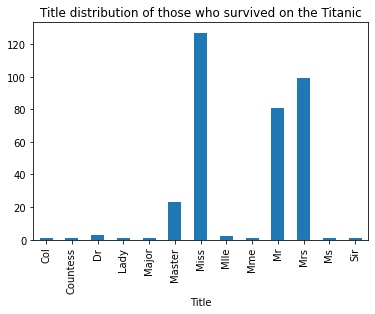

In [60]:
plt.title('Title distribution of those who survived on the Titanic')
(train[train.Survived == 1]
.groupby(['Title'])
.Title
.count()
.plot(kind='bar')
)

<AxesSubplot:title={'center':'Title distribution of those who died on the Titanic'}, xlabel='Title'>

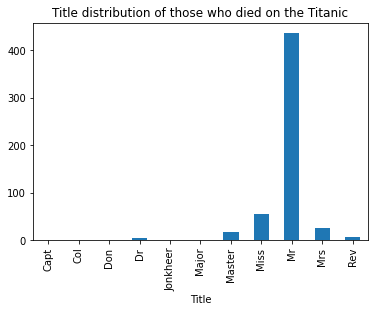

In [61]:
plt.title('Title distribution of those who died on the Titanic')
(train[train.Survived == 0]
.groupby(['Title'])
.Title
.count()
.plot(kind='bar')
)

It's hard to say if there is a correlation between title and survival. We can see see that the largest group of those who died held the title Mr. This relationship could be indirectly, for example master is a title for young men and more children surrived than adults.

In [62]:
# Extract first name into separate column
train['First_names'] = train['Name'].map(lambda x: x.split('.')[1].split('(')[0].strip())
print(train['First_names'][0:5])

PassengerId
1      Owen Harris
2     John Bradley
3            Laina
4    Jacques Heath
5    William Henry
Name: First_names, dtype: object


In [63]:
number_of_passengers_named_john = len(train.loc[train['First_names'] == 'John'])

In [64]:
(train
.groupby(['Survival', 'First_names'])
.First_names
.count()
.sort_values(ascending=False)
[:10]
)

Survival  First_names  
Survived                   13
Died      John             10
          William           9
          James             7
Survived  Bertha            4
Died      Joseph            4
          William Henry     3
          Tannous           3
          Thomas            3
Survived  Mary              3
Name: First_names, dtype: int64

While it remains unlikely someone's first name would play a role in their survival on the Titanic interesting all of the passengers in the training data called John died. This isn't statistically so suprising as they were most likely male passengers and we've already discovered male passengers were predominently in the group which died. It may point to patterns in the names given to different classes if indeed such a thing existed.

In [65]:
# Extract alternative name into separate column
train['Alternative_name'] = train['Name'].map(lambda x: x.split('(')[1].split(')')[0] if '(' in x else '')
print(train['Alternative_name'][0:5])

PassengerId
1                          
2    Florence Briggs Thayer
3                          
4             Lily May Peel
5                          
Name: Alternative_name, dtype: object


In [66]:
# Extract alternative surname (most likely maiden name) into separate column
train['Alternative_surname'] = train['Alternative_name'].map(lambda alt_name: '' if alt_name == '' else alt_name.split()[-1])
for alt_surname in train['Alternative_surname'].unique():
    print(alt_surname, train.loc[(train['Alternative_surname'] == alt_surname)].Alternative_surname.count())

 748
Thayer 1
Peel 1
Berg 1
Achem 1
Kingcome 1
Vandemoortele 1
Johansson 1
Eugenie 1
Larsson 1
Wonnacott 1
Franchi 1
Haxtun 1
Wilkinson 1
Ramell 1
Gustafsson 1
Bone 1
"Pentcho" 1
Laury 1
Pede 1
Sultana 1
Dolck 1
"Wennerstrom" 1
Hoffman" 1
Wearne 1
Milne 1
Bowerman 1
Karlsson 1
Godfrey 1
Rolmane" 1
Rosa 1
Tobin 1
Harbeck" 1
"Henry" 1
Wallach 1
Anna 1
Persson 1
Wilhelmina 1
Razi 1
Davis 1
Junkins 1
Maidment 1
Hunt 1
Walton 1
Chaput 1
Vallejo 1
Sylfven 1
Sternin 1
Stone 1
Harbaugh 1
Hall 2
Brown 1
Heinsheimer 1
Finck 1
David 1
Atkinson 1
Boulos 1
Saks 1
"Mary" 1
Towner 1
Bengtsson 1
L 1
Rowley 1
Christian 1
Brogren 2
Winfield 1
Marshall" 2
Trembisky 1
White 1
Slow 1
Hocking 1
Bloomfield 1
Marion 1
Worth 1
Thuillard 1
Hedwig 1
Forby 1
Daniels 1
Richards 1
Brayton" 1
Barrett 1
Milley 1
Hughes 2
Fischer 1
Rizk 1
Clarke 1
Zenni" 1
Sutherland 1
Mandelbaum 1
Emma 1
Ogden 1
Berglund 1
Lamson 1
"Irving" 1
Munger 1
Elias 1
Morris 1
Eustis 1
Morgan" 1
Christy 1
Haven" 1
Lafargue 1
Stanlick 1
Ojala 

In [67]:
# Look at how many values there are for cabin
for cabin in train['Cabin'].unique():
    print(cabin, train.loc[(train['Cabin'] == cabin)].size)

nan 0
C85 20
C123 40
E46 20
G6 80
C103 20
D56 20
A6 20
C23 C25 C27 80
B78 20
D33 40
B30 20
C52 40
B28 40
C83 40
F33 60
F G73 40
E31 20
A5 20
D10 D12 20
D26 40
C110 20
B58 B60 40
E101 60
F E69 20
D47 20
B86 20
F2 60
C2 40
E33 40
B19 20
A7 20
C49 20
F4 40
A32 20
B4 20
B80 20
A31 20
D36 40
D15 20
C93 40
C78 40
D35 40
C87 20
B77 40
E67 40
B94 20
C125 40
C99 20
C118 20
D7 20
A19 20
B49 40
D 60
C22 C26 60
C106 20
C65 40
E36 20
C54 20
B57 B59 B63 B66 40
C7 20
E34 20
C32 20
B18 40
C124 40
C91 20
E40 20
T 20
C128 20
D37 20
B35 40
E50 20
C82 20
B96 B98 80
E10 20
E44 40
A34 20
C104 20
C111 20
C92 40
E38 20
D21 20
E12 20
E63 20
A14 20
B37 20
C30 20
D20 40
B79 20
E25 40
D46 20
B73 20
C95 20
B38 20
B39 20
B22 40
C86 20
C70 20
A16 20
C101 20
C68 40
A10 20
E68 20
B41 20
A20 20
D19 20
D50 20
D9 20
A23 20
B50 20
A26 20
D48 20
E58 20
C126 40
B71 20
B51 B53 B55 40
D49 20
B5 40
B20 40
F G63 20
C62 C64 20
E24 40
C90 20
C45 20
E8 40
B101 20
D45 20
C46 20
D30 20
E121 40
D11 20
E77 20
F38 20
B3 20
D6 20
B82 B8

In [68]:
# Extract which deck a passager had their cabin based on the Cabin number
train['Deck']= train['Cabin'].map(lambda x: 'Unknown' if str(x) == 'nan' else str(x)[0])

<AxesSubplot:title={'center':'Realtionship between Deck and survival on the Titanic'}, xlabel='Survival,Deck'>

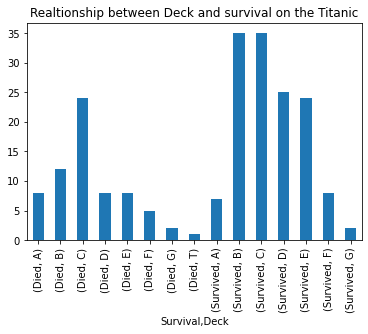

In [69]:
plt.title('Realtionship between Deck and survival on the Titanic')
(train[train.Deck != 'Unknown']
.groupby(['Survival', 'Deck'])
.Deck
.count()
.plot(kind='bar')
)

This maybe gives some insight to how decks were labelled on the titanic. We would ideally want to look at a map to see where the decks were to read more into these results. Did decks divide classes, did they also divide workers from passengers? Did all decks have the same amount of occupants? However it seems surrival seemed more likely if you were on deck E, D, B.

In [70]:
deck_data = train[train.Deck != 'Unknown'].groupby(['Deck', 'Survival']).Deck.count() # remove unknowns as they skew the data
deck_data


Deck  Survival
A     Died         8
      Survived     7
B     Died        12
      Survived    35
C     Died        24
      Survived    35
D     Died         8
      Survived    25
E     Died         8
      Survived    24
F     Died         5
      Survived     8
G     Died         2
      Survived     2
T     Died         1
Name: Deck, dtype: int64

<ipython-input-71-c9dd65f53064>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  deck_survival_ratio = pd.Series()


<AxesSubplot:title={'center':'Ratio of survival per deck on the Titanic'}>

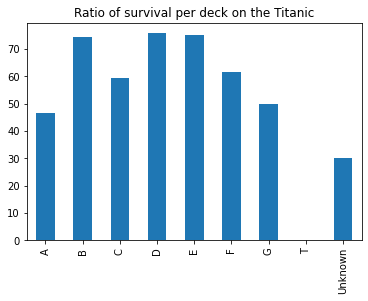

In [71]:
deck_survival_ratio = pd.Series()

for deck in train.Deck:
    survivors = train[(train.Deck == deck) & (train.Survived == 1)].Deck.count()
    total_deck_passengers = train[train.Deck == deck].Deck.count()
    ratio = (survivors/total_deck_passengers)*100
    deck_survival_ratio[deck] = ratio

plt.title('Ratio of survival per deck on the Titanic')
deck_survival_ratio.sort_index().plot(kind='bar')

In [72]:
# Extract the ticket type (assuming potentially where they bought the ticket) from the ticket value
train['Ticket_type'] = train['Ticket'].map(lambda x: x.split()[0] if any(c.isalpha() for c in x.split()[0]) else 'Unknown')
print(train['Ticket_type'].unique())
print(train['Ticket_type'].unique().size)

['A/5' 'PC' 'STON/O2.' 'Unknown' 'PP' 'A/5.' 'C.A.' 'A./5.' 'SC/Paris'
 'S.C./A.4.' 'A/4.' 'CA' 'S.P.' 'S.O.C.' 'SO/C' 'W./C.' 'SOTON/OQ'
 'W.E.P.' 'STON/O' 'A4.' 'C' 'SOTON/O.Q.' 'SC/PARIS' 'S.O.P.' 'A.5.' 'Fa'
 'CA.' 'LINE' 'F.C.C.' 'W/C' 'SW/PP' 'SCO/W' 'P/PP' 'SC' 'SC/AH' 'A/S'
 'A/4' 'WE/P' 'S.W./PP' 'S.O./P.P.' 'F.C.' 'SOTON/O2' 'S.C./PARIS'
 'C.A./SOTON']
44


<AxesSubplot:title={'center':'Realtionship between Ticket type and survival on the Titanic'}, xlabel='Survival,Ticket_type'>

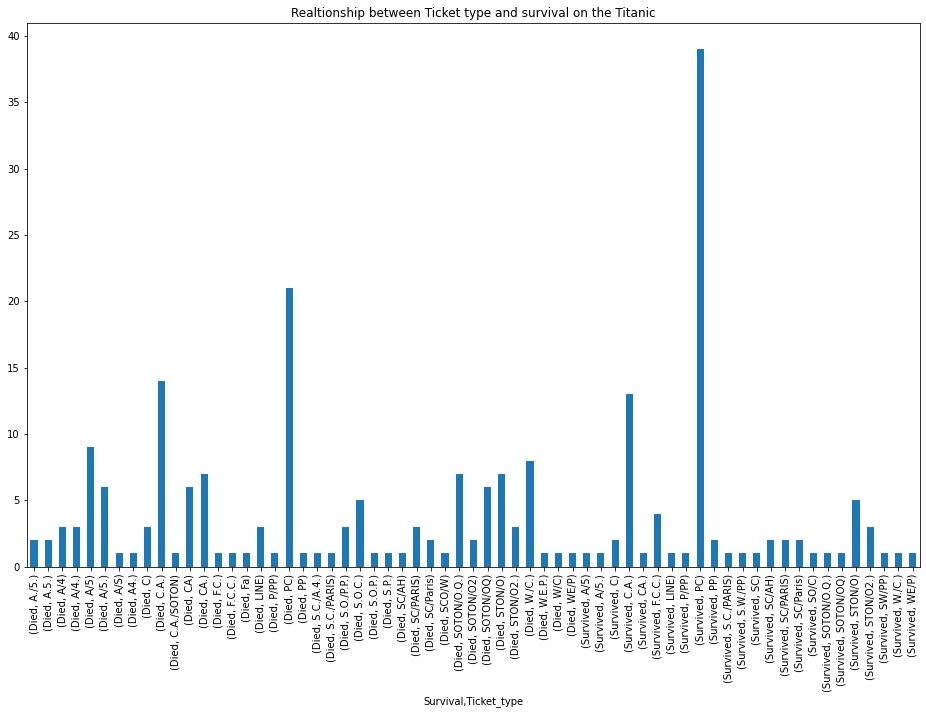

In [73]:
plt.figure(figsize=(16,10))
plt.title('Realtionship between Ticket type and survival on the Titanic')
(train[train.Ticket_type != 'Unknown']
.groupby(['Survival', 'Ticket_type'])
.Ticket_type
.count()
.plot(kind='bar')
)

In [74]:
# Look at how many values there are for ticket tzpe
for ticket in train['Ticket_type'].unique():
    print(ticket, train.loc[(train['Ticket_type'] == ticket)].Ticket_type.count())

A/5 10
PC 60
STON/O2. 6
Unknown 661
PP 3
A/5. 7
C.A. 27
A./5. 2
SC/Paris 4
S.C./A.4. 1
A/4. 3
CA 6
S.P. 1
S.O.C. 5
SO/C 1
W./C. 9
SOTON/OQ 7
W.E.P. 1
STON/O 12
A4. 1
C 5
SOTON/O.Q. 8
SC/PARIS 5
S.O.P. 1
A.5. 2
Fa 1
CA. 8
LINE 4
F.C.C. 5
W/C 1
SW/PP 1
SCO/W 1
P/PP 2
SC 1
SC/AH 3
A/S 1
A/4 3
WE/P 2
S.W./PP 1
S.O./P.P. 3
F.C. 1
SOTON/O2 2
S.C./PARIS 2
C.A./SOTON 1


In [75]:
# Put feature columns into X_train dataframe
# base_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Surname', 'Title', 'Alternative_surname', 'Deck', 'Ticket_type']
base_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Deck', 'Ticket_type']
X_train = train[base_features].copy()
X_train.index = train.index
# Put survival value into y
y = train['Survived']

print(y.head())
X_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,Ticket_type
PassengerId,,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Mr,Unknown,A/5
2,1,female,38.0,1,0,71.2833,C,Mrs,C,PC
3,3,female,26.0,0,0,7.9250,S,Miss,Unknown,STON/O2.
4,1,female,35.0,1,0,53.1000,S,Mrs,C,Unknown
5,3,male,35.0,0,0,8.0500,S,Mr,Unknown,Unknown


In [76]:
# Look at what data is categorical data
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['Sex', 'Embarked', 'Title', 'Deck', 'Ticket_type']


In [77]:
# Update the Embarked column to replace nan values with unknown
X_train['Embarked'] = X_train['Embarked'].fillna('unknown')

print(X_train['Embarked'].unique())

['S' 'C' 'Q' 'unknown']


In [78]:
# Update the Age column to replace nan values with the mean value
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)

In [79]:
# Check cardinality of categorical variables
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))
# Print in ascending order
sorted(d.items(), key=lambda x: x[1])

# We can conclude that for those with low cardinality we can use one-hot encoding and for the time being I am dropping those with high cardinality

[('Sex', 2), ('Embarked', 4), ('Deck', 9), ('Title', 17), ('Ticket_type', 44)]

In [80]:
# Assign categorical data columns to low or high cardinality lists
low_cardinality = ['Deck', 'Title', 'Sex', 'Embarked', 'Ticket_type']
# high_cardinality  = ['Ticket_type', 'Alternative_surname', 'Surname']

In [81]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for col in high_cardinality:
#     X_train[col] = label_encoder.fit_transform(X_train[col])

X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    object 
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Title        891 non-null    object 
 8   Deck         891 non-null    object 
 9   Ticket_type  891 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [82]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality]))
print('OH_cols_train: ', OH_cols_train.columns.tolist(), ' shape ', OH_cols_train.shape)
non_oh_encoded = X_train.drop(low_cardinality, axis=1)
OH_cols_train.index = X_train.index
print('non_oh_encoded: ', non_oh_encoded.columns.tolist(), ' shape ', non_oh_encoded.shape)
OH_X_train = pd.concat([non_oh_encoded, OH_cols_train], axis=1)
OH_X_train.index = X_train.index
print('OH_X_train: ', OH_X_train.columns.tolist(), ' shape ', OH_X_train.shape)
OH_X_train.columns

OH_cols_train:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]  shape  (891, 76)
non_oh_encoded:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  shape  (891, 5)
OH_X_train:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]  shape  (891, 81)


Index(['Pclass',    'Age',  'SibSp',  'Parch',   'Fare',        0,        1,
              2,        3,        4,        5,        6,        7,        8,
              9,       10,       11,       12,       13,       14,       15,
             16,       17,       18,       19,       20,       21,       22,
             23,       24,       25,       26,       27,       28,       29,
             30,       31,       32,       33,       34,       35,       36,
             37,       38,       39,       40,       41,       42,       43,
             44,       45,       46,       47,       48,       49,       50,
             51,       52,       53,       54,       55,       56,       57,
             58,       59,       60,       61,       62,       63,       64,
             65,       66,       67,       68,       69,       70,       71,
             72,       73,       74,       75],
      dtype='object')

In [83]:
# update column names to string type
OH_X_train.columns = OH_X_train.columns.astype(str)

In [84]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(OH_X_train, y, random_state = 0)

In [85]:
val_X.dropna(axis=0, how='any', inplace=True)

<ipython-input-85-b3c74f6ec8dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_X.dropna(axis=0, how='any', inplace=True)


In [86]:
print(train_X.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75'],
      dtype='object')


In [87]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(train_X, train_y.values.ravel())

RandomForestClassifier(random_state=0)

In [88]:
predictions = rf_model.predict(val_X)

In [89]:
print(predictions[0:5])
print(val_y[0:5])
print(f'Accuracy: {rf_model.score(val_X, val_y):.2f}%')

[0 0 0 1 1]
PassengerId
496    0
649    0
279    0
32     1
256    1
Name: Survived, dtype: int64
Accuracy: 0.85%


In [90]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_model, random_state=1).fit(val_X, val_y)

eli5.show_weights(perm, feature_names=val_X.columns.tolist())

Weight,Feature
0.0664 ± 0.0297,Fare
0.0475 ± 0.0091,Pclass
0.0422 ± 0.0303,21
0.0359 ± 0.0170,Age
0.0152 ± 0.0156,71
0.0126 ± 0.0223,SibSp
0.0108 ± 0.0166,27
0.0090 ± 0.0150,30
0.0063 ± 0.0044,50
0.0045 ± 0.0000,1


### Permutation importance of features

Here it appears that Pclass, Fare, Age and sibsp have relatively high importance as features. One or two of the one-hot-encoded values also appear to have a high importance. With the current one-hot-encoder I unfortunately cannot tell which one these refers to.

In [91]:
important_features = ['Pclass', 'Fare', 'Age','SibSp', '21', '71', '27', '30', '50', '1', '41', '2', '22', '26']

In [92]:
from sklearn.model_selection import train_test_split
train_reduced_features_X, val_reduced_features_X, train_reduced_features_y, val_reduced_features_y = train_test_split(OH_X_train[important_features], y, random_state = 0)
val_X.dropna(axis=0, how='any', inplace=True)

from sklearn.ensemble import RandomForestClassifier
rf_reduced_features_model = RandomForestClassifier(random_state=0)
rf_reduced_features_model.fit(train_reduced_features_X, train_reduced_features_y.values.ravel())

predictions = rf_reduced_features_model.predict(val_reduced_features_X)

print('Predictions: ', predictions[0:5])
print('Y Values: ', val_reduced_features_y[0:5])
print(f'Accuracy: {rf_reduced_features_model.score(val_reduced_features_X, val_reduced_features_y):.2f}%')

Predictions:  [0 0 0 1 1]
Y Values:  PassengerId
496    0
649    0
279    0
32     1
256    1
Name: Survived, dtype: int64
Accuracy: 0.83%


<ipython-input-92-586d9f136193>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_X.dropna(axis=0, how='any', inplace=True)


In [93]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [96]:
test_character = val_reduced_features_X.iloc[0]
print(test_character)

Pclass     3.000000
Fare      14.458300
Age       29.699118
SibSp      0.000000
21         1.000000
71         1.000000
27         1.000000
30         0.000000
50         0.000000
1          0.000000
41         0.000000
2          0.000000
22         0.000000
26         0.000000
Name: 496, dtype: float64


In [97]:
prediction = rf_reduced_features_model.predict(test_character)

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.       14.4583   29.699118  0.        1.        1.        1.
  0.        0.        0.        0.        0.        0.        0.      ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

We can see here our accuracy has actually been reduced by using only the features that the permutation said were important.

### Partial dependence plots

In [ ]:
from pdpbox import pdp, get_dataset, info_plots


for feature_name in important_features:
    pdp_goals = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=val_X.columns.tolist(), feature=feature_name)
    pdp.pdp_plot(pdp_goals, feature_name)
    plt.show()

### 2D Partial Dependance Plots

In [ ]:
inter1 = pdp.pdp_interact(model=rf_model, dataset=val_X, model_features=val_X.columns.tolist(), features=important_features)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=val_X.columns.tolist(), plot_type='contour')
plt.show()

### SHAP Values
break down a prediction to show the impact of each feature.

In [ ]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


rf_model.predict_proba(data_for_prediction_array)

In [ ]:
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
data_for_prediction = val_X.iloc[1]
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction) # looking at values for those that surrived
#  Shap values show how much a given feature changed our prediction (compared to if we made that prediction at some baseline value of that feature).

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

In [ ]:
# # Create object that can calculate shap values
# explainer = shap.TreeExplainer(my_model)

# # calculate shap values. This is what we will plot.
# shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('Age', shap_values[1], val_X, interaction_index="Pclass")

### Serialize model

In [ ]:
import joblib
joblib.dump(rf_model, "../../src/artifacts/titanic_clf.joblib")

In [ ]:
import joblib
joblib.dump(rf_model, "../../src/artifacts/titanic_clf.joblib")